## **Data set**

In [1]:
url = "https://drive.google.com/uc?export=download&id=1ayA6T5QerYkjQgDrhB5Z4ekxKYluiuDQ"

## **Import the modules**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

## **Data Cleaning**

#### **Data importing**

In [3]:
df = pd.read_csv(url)
df.head()

Date  Home_ID       City  Energy_Consumption_kWh  Occupancy  \
0  2024-03-14 06:00:00   Home_8    Lucknow                    3.14          1   
1  2024-04-06 06:00:00   Home_9  Hyderabad                    4.70          1   
2  2024-01-30 13:00:00   Home_4    Lucknow                    2.27          0   
3  2024-03-05 12:00:00   Home_5  Ahmedabad                    0.80          0   
4  2024-01-19 00:00:00  Home_10    Kolkata                    2.43          0   

   Temperature_C  Humidity_%  HVAC_Usage_kWh  Kitchen_Usage_kWh  \
0          25.71       46.10            1.12               0.97   
1          27.73       45.42            0.54               1.45   
2          16.20       57.50           -0.22               0.21   
3          23.30       58.46            2.15               0.82   
4          21.18       84.52            1.65               0.27   

   Electronics_Usage_kWh  
0                   0.38  
1                   0.30  
2                   0.26  
3                   0.55  
4                   0.94

In [4]:
print(f"Shape of the dataset : {df.shape}")
print(f"Total size of the dataset : {df.size}")

Shape of the dataset : (2500, 10)
Total size of the dataset : 25000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    2500 non-null   object 
 1   Home_ID                 2500 non-null   object 
 2   City                    2500 non-null   object 
 3   Energy_Consumption_kWh  2450 non-null   float64
 4   Occupancy               2500 non-null   int64  
 5   Temperature_C           2450 non-null   float64
 6   Humidity_%              2450 non-null   float64
 7   HVAC_Usage_kWh          2450 non-null   float64
 8   Kitchen_Usage_kWh       2500 non-null   float64
 9   Electronics_Usage_kWh   2500 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 195.4+ KB


In [6]:
df.describe()

Energy_Consumption_kWh    Occupancy  Temperature_C   Humidity_%  \
count             2450.000000  2500.000000    2450.000000  2450.000000   
mean                 3.515151     0.696000      23.949718    59.877824   
std                  1.373759     0.460075       5.245470    14.790739   
min                 -0.670000     0.000000       7.260000     8.190000   
25%                  2.680000     0.000000      20.432500    49.725000   
50%                  3.500000     1.000000      23.910000    59.660000   
75%                  4.310000     1.000000      27.450000    69.770000   
max                 33.480000     1.000000      49.140000   113.160000   

       HVAC_Usage_kWh  Kitchen_Usage_kWh  Electronics_Usage_kWh  
count     2450.000000        2500.000000            2500.000000  
mean         1.009151           0.799344               0.510372  
std          0.508385           0.405211               0.297242  
min         -1.030000          -0.650000              -0.560000  
25%          0.670000           0.520000               0.310000  
50%          1.020000           0.810000               0.510000  
75%          1.360000           1.080000               0.710000  
max          2.550000           2.310000               1.570000

In [7]:
df.isnull().sum()

Date                       0
Home_ID                    0
City                       0
Energy_Consumption_kWh    50
Occupancy                  0
Temperature_C             50
Humidity_%                50
HVAC_Usage_kWh            50
Kitchen_Usage_kWh          0
Electronics_Usage_kWh      0
dtype: int64

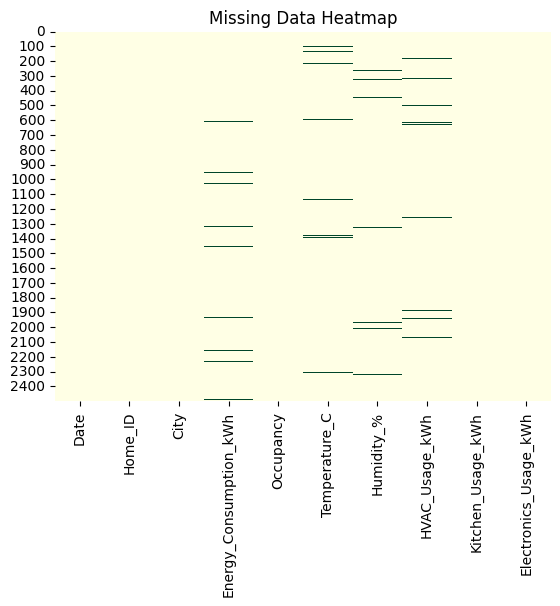

In [8]:
sns.heatmap(df.isnull() , cmap = "YlGn" , cbar = False)
plt.title("Missing Data Heatmap")
plt.yticks(ticks = np.arange(0, len(df), step = 100), labels = np.arange(0, len(df), step = 100))
plt.show()

- Since the missing values are random, removing all rows with null values could significantly reduce the dataset, potentially leading to loss of valuable information.
- Therefore, it's more practical to use techniques to fill in the missing values that are relevant to the data.

#### **Handling missing values**

- **With the help of backfilling method we can fill the null values related to that respective row**
- **Backfilling:**
    - Definition - Backfilling fills missing values with the next available non-null value in the column.
    - Usage - It is useful when the next data point logically represents the missing value, such as in time series or sequential data. 

In [9]:
df['Energy_Consumption_kWh'] = df['Energy_Consumption_kWh'].bfill()
df['Temperature_C'] = df['Temperature_C'].bfill()
df['Humidity_%'] = df['Humidity_%'].bfill()
df['HVAC_Usage_kWh'] = df['HVAC_Usage_kWh'].bfill()

In [10]:
df.isnull().sum()

Date                      0
Home_ID                   0
City                      0
Energy_Consumption_kWh    0
Occupancy                 0
Temperature_C             0
Humidity_%                0
HVAC_Usage_kWh            0
Kitchen_Usage_kWh         0
Electronics_Usage_kWh     0
dtype: int64

- with the help of backfilling method we have filled all the nullvalues

#### **Outlier Detection and Handling**

- HVAC_Usage_kWh, Kitchen_Usage_kWh, and Electronics_Usage_kWh are directly related to **Energy_Consumption_kWh**.
- Humidity_% is influenced by **Temperature_C**.
- Therefore, it's sufficient to **check for outliers** only in **Energy_Consumption_kWh and Temperature_C**.
- Analyzing these two key features will help maintain data integrity without unnecessary complexity.

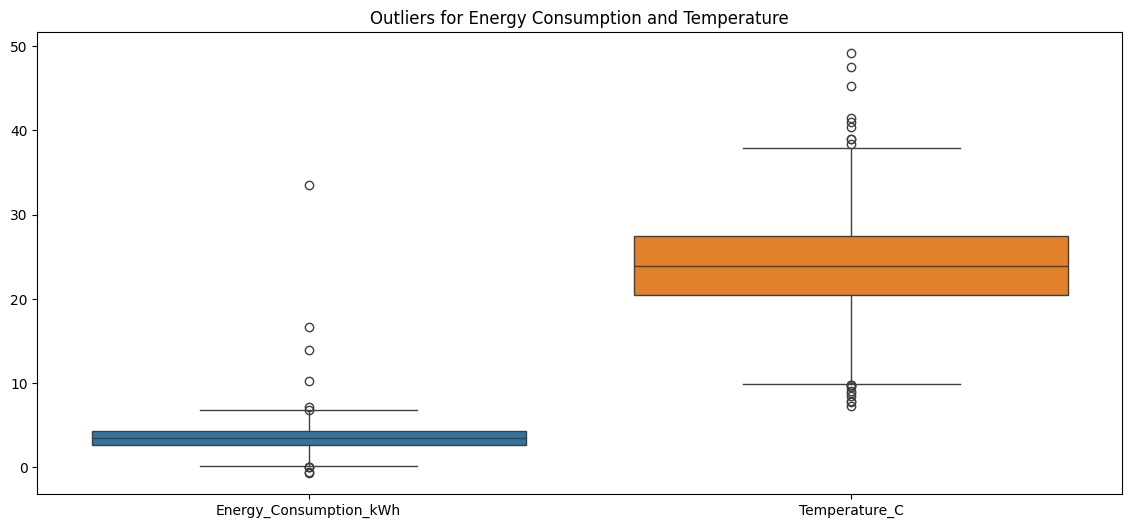

In [11]:
plt.figure(figsize = (14,6))
sns.boxplot(data = df[['Energy_Consumption_kWh' , 'Temperature_C']])
plt.title("Outliers for Energy Consumption and Temperature")
plt.show()

**Methods to Remove Outliers:**
- **Using Z-Value:** Identifies outliers by measuring how many standard deviations a data point is from the mean.
- **Using IQR Method:** Determines outliers by calculating the interquartile range(IQR).

In [12]:
Q1_energy = df['Energy_Consumption_kWh'].quantile(0.25)
Q3_energy = df['Energy_Consumption_kWh'].quantile(0.75)
IQR_energy = Q3_energy - Q1_energy
lower_energy = Q1_energy - 1.5 * IQR_energy
upper_energy = Q3_energy + 1.5 * IQR_energy

df['Energy_Consumption_kWh'] = df['Energy_Consumption_kWh'].clip(lower_energy, upper_energy)

Q1_temp = df['Temperature_C'].quantile(0.25)
Q3_temp = df['Temperature_C'].quantile(0.75)
IQR_temp = Q3_temp - Q1_temp
lower_temp = Q1_temp - 1.5 * IQR_temp
upper_temp = Q3_temp + 1.5 * IQR_temp

df['Temperature_C'] = df['Temperature_C'].clip(lower_temp, upper_temp)

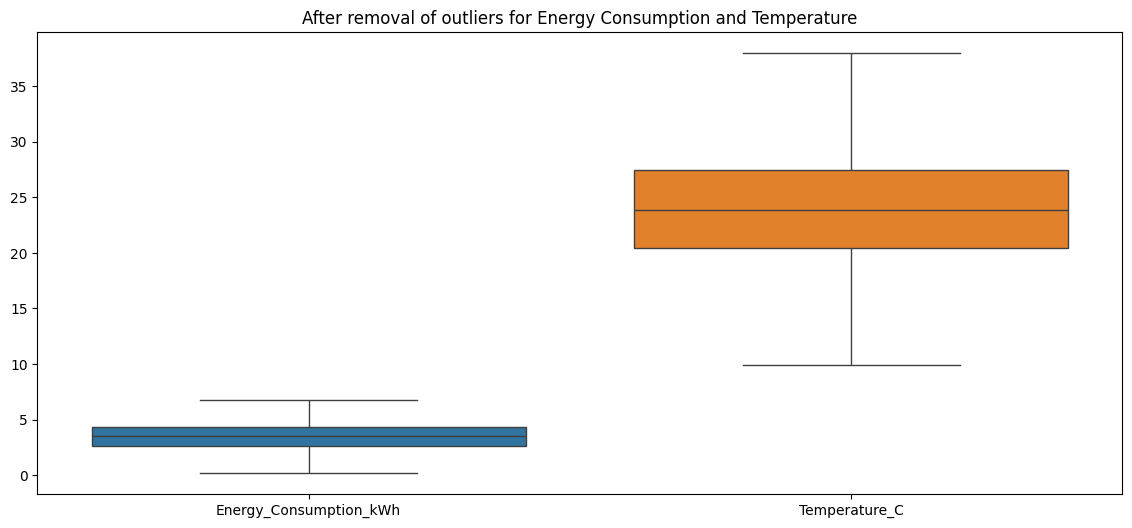

In [13]:
plt.figure(figsize = (14,6))
sns.boxplot(data = df[['Energy_Consumption_kWh' , 'Temperature_C']])
plt.title("After removal of outliers for Energy Consumption and Temperature")
plt.show()

#### **Time-Series Consistency**

In [14]:
df['Date'] = pd.to_datetime(df['Date'])

In [15]:
df.dtypes

Date                      datetime64[ns]
Home_ID                           object
City                              object
Energy_Consumption_kWh           float64
Occupancy                          int64
Temperature_C                    float64
Humidity_%                       float64
HVAC_Usage_kWh                   float64
Kitchen_Usage_kWh                float64
Electronics_Usage_kWh            float64
dtype: object

In [16]:
duplicates = df[df.duplicated(subset = ['Date' , 'Home_ID'])]
print(f"Duplicate values : {len(duplicates)}")

Duplicate values : 0


- Since there are no duplicate values, we do not need to remove any data from the dataset.

#### **Data Normalization**

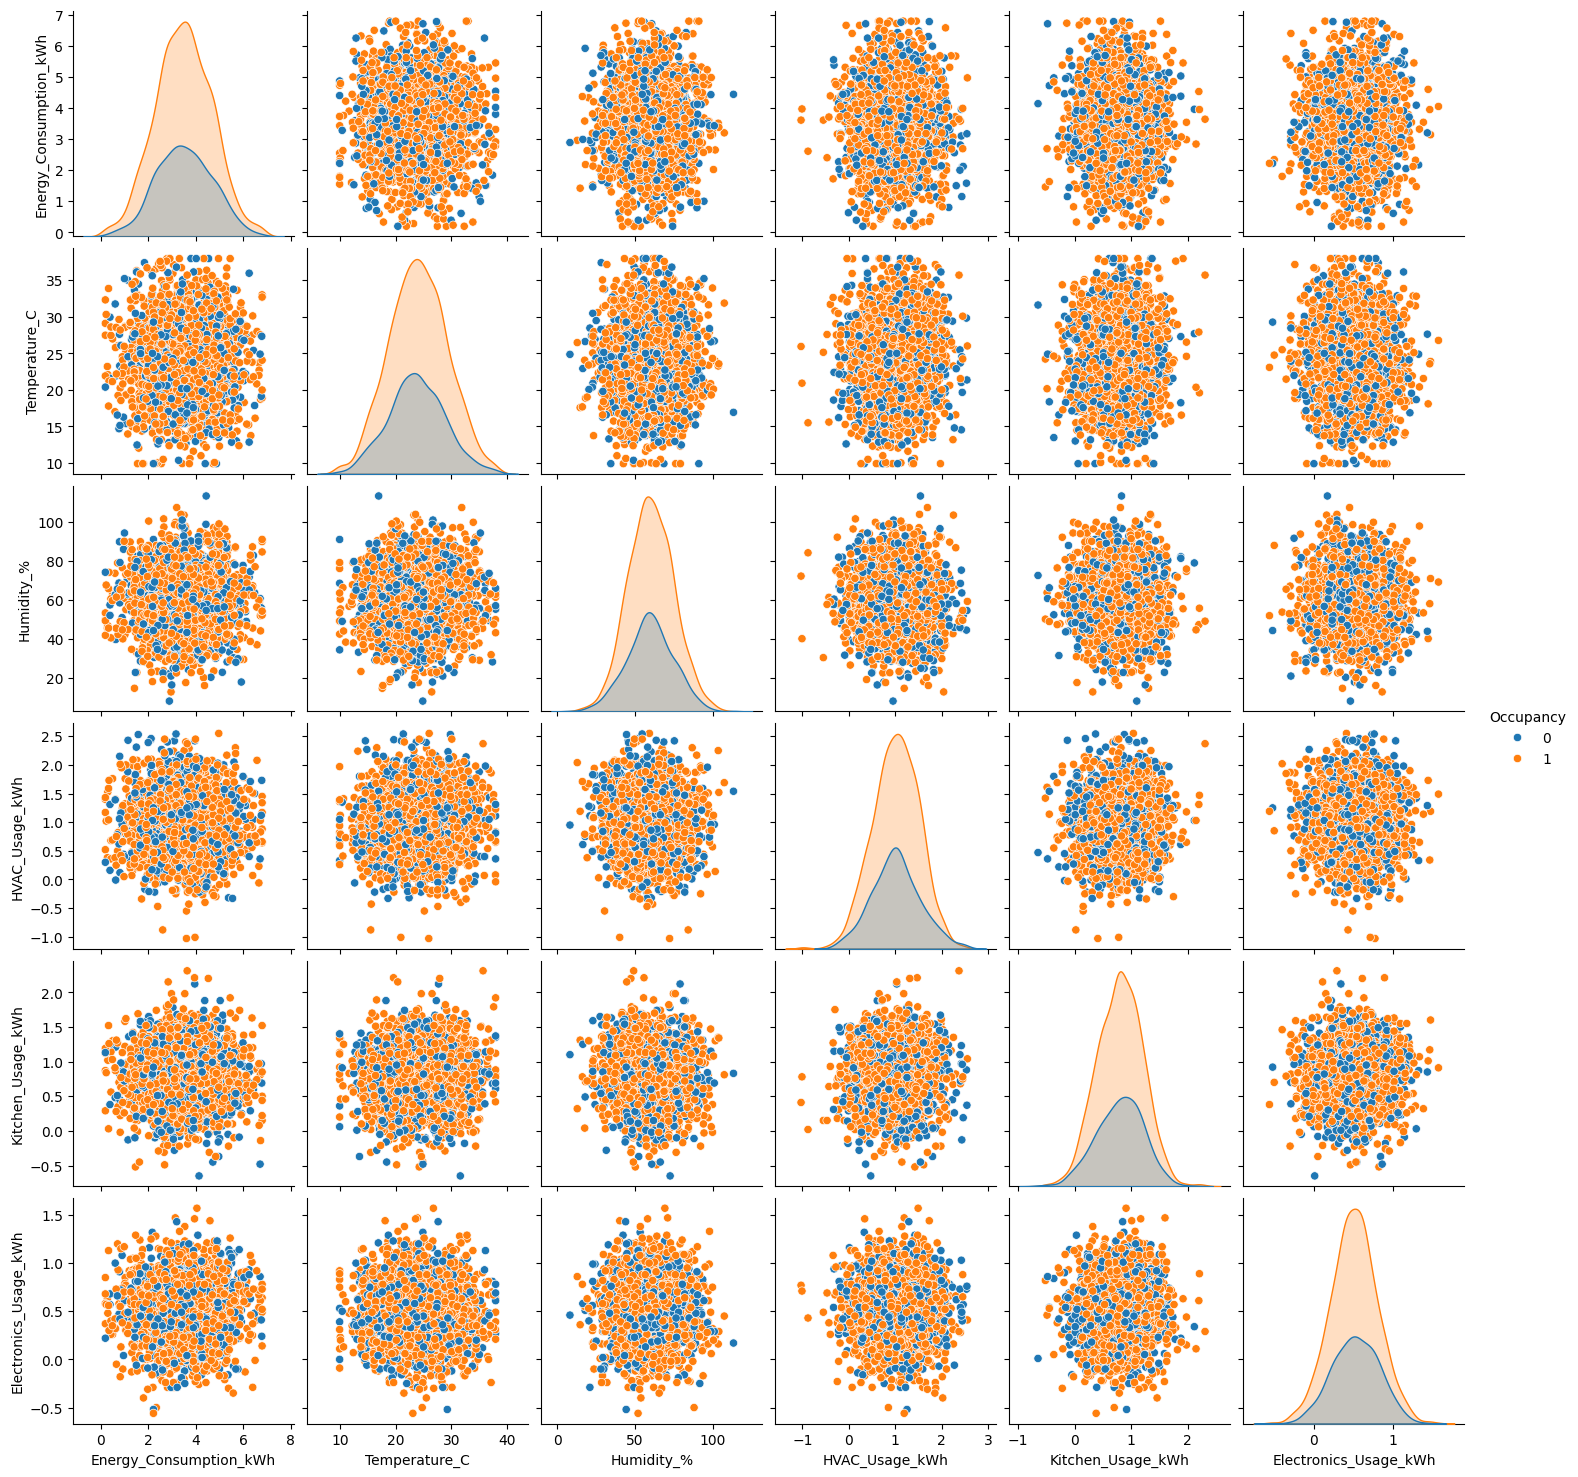

In [17]:
sns.pairplot(df , hue='Occupancy')
plt.show()

- Since the data are **normally distributed**, we can use standardization with StandardScaler. 
- This method scales the values so that they have a mean of 0 and a standard deviation of 1, effectively normalizing the data within the range of approximately 3 standard deviations.

In [18]:
scaler = StandardScaler()

col_to_normalize = ['Energy_Consumption_kWh', 'Temperature_C', 'Humidity_%', 'HVAC_Usage_kWh', 'Kitchen_Usage_kWh', 'Electronics_Usage_kWh']
df[col_to_normalize] = scaler.fit_transform(df[col_to_normalize])

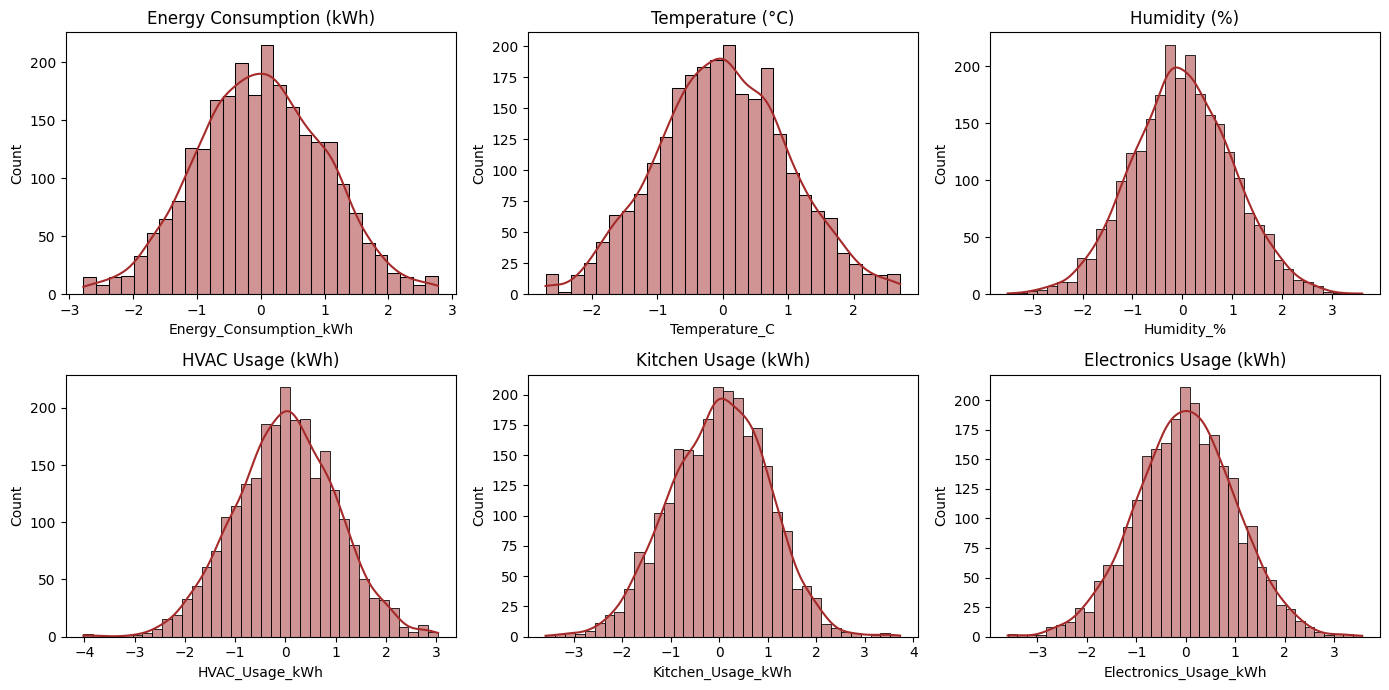

In [19]:
plt.figure(figsize=(14, 7))

plt.subplot(2, 3, 1)
sns.histplot(df['Energy_Consumption_kWh'], kde=True , color = 'brown')
plt.title('Energy Consumption (kWh)')

plt.subplot(2, 3, 2)
sns.histplot(df['Temperature_C'], kde=True , color = 'brown')
plt.title('Temperature (°C)')

plt.subplot(2, 3, 3)
sns.histplot(df['Humidity_%'], kde=True , color = 'brown')
plt.title('Humidity (%)')

plt.subplot(2, 3, 4)
sns.histplot(df['HVAC_Usage_kWh'], kde=True , color = 'brown')
plt.title('HVAC Usage (kWh)')

plt.subplot(2, 3, 5)
sns.histplot(df['Kitchen_Usage_kWh'], kde=True , color = 'brown')
plt.title('Kitchen Usage (kWh)')

plt.subplot(2, 3, 6)
sns.histplot(df['Electronics_Usage_kWh'], kde=True , color = 'brown')
plt.title('Electronics Usage (kWh)')

plt.tight_layout()
plt.show()

#### **Documentation of Data Cleaning**

- **Dataset Overview:** The dataset contains 2,500 rows and 10 columns, including both numeric and categorical data types.
- **Date Conversion:** The 'Date' column was converted to a datetime format to facilitate time-based analysis.
- **Handling Missing Values:** Since the missing values are randomly distributed across the dataset, a backfilling technique was used to fill the NaN values with relevant data from subsequent rows.
- **Outlier Removal:** The Interquartile Range (IQR) method was employed to remove outliers. Outliers were specifically removed from the 'Energy_Consumption_kWh' and 'Temperature_C' columns as they are critical variables in the dataset.
- **Time Series Duplication Check:** To ensure data quality, a check was performed to identify any duplicate entries based on 'Home_ID' in the time series data. No duplicates were found.
- **Data Standardization:** A pair plot was generated to visually assess the distribution of the data. Since the data appeared to be normally distributed, standardization was applied to scale the values appropriately.

## **Numeric data and Categorical data**

In [20]:
df_num = df.select_dtypes(include = np.number)

In [21]:
df_cat = df.select_dtypes(include = 'object')

In [22]:
df_num.head()

Energy_Consumption_kWh  Occupancy  Temperature_C  Humidity_%  \
0               -0.300436          1       0.342959   -0.935276   
1                1.013830          1       0.733271   -0.981267   
2               -1.033392          0      -1.494597   -0.164247   
3               -2.271835          0      -0.122710   -0.099318   
4               -0.898596          0      -0.532344    1.663227   

   HVAC_Usage_kWh  Kitchen_Usage_kWh  Electronics_Usage_kWh  
0        0.217523           0.421238              -0.438693  
1       -0.925220           1.606044              -0.707888  
2       -2.422607          -1.454705              -0.842485  
3        2.246877           0.050986               0.133346  
4        1.261754          -1.306604               1.445670

In [23]:
df_cat.head()

Home_ID       City
0   Home_8    Lucknow
1   Home_9  Hyderabad
2   Home_4    Lucknow
3   Home_5  Ahmedabad
4  Home_10    Kolkata

## **Exploratory Data Analysis (EDA) & Visualization**

#### **Univariate Analysis**

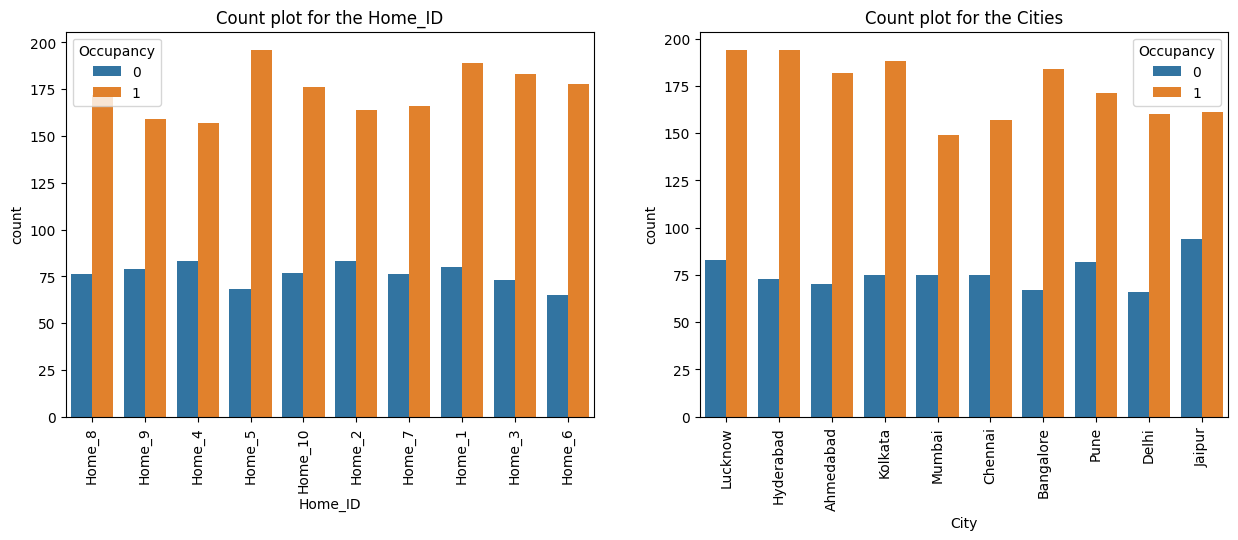

In [24]:
plt.figure(figsize = (15,5))

plt.subplot(1 , 2 , 1)
sns.countplot(df , x = 'Home_ID' , hue = 'Occupancy')
plt.xticks(rotation = 90)
plt.title("Count plot for the Home_ID")

plt.subplot(1 , 2 , 2)
sns.countplot(df , x = 'City' , hue = 'Occupancy')
plt.xticks(rotation = 90)
plt.title("Count plot for the Cities")

plt.tight_layout
plt.show()

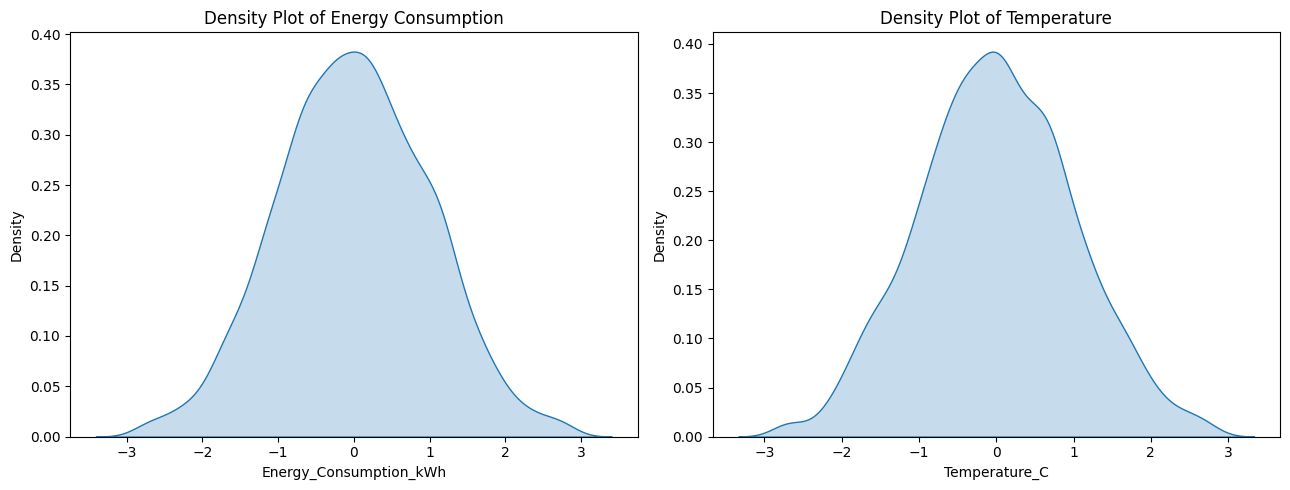

In [25]:
plt.figure(figsize = (13,5))

plt.subplot(1 , 2  , 1)
sns.kdeplot(df['Energy_Consumption_kWh'] , fill = True)
plt.title("Density Plot of Energy Consumption")

plt.subplot(1 , 2 , 2)
sns.kdeplot(df['Temperature_C'] , fill = True)
plt.title("Density Plot of Temperature")

plt.tight_layout()
plt.show()

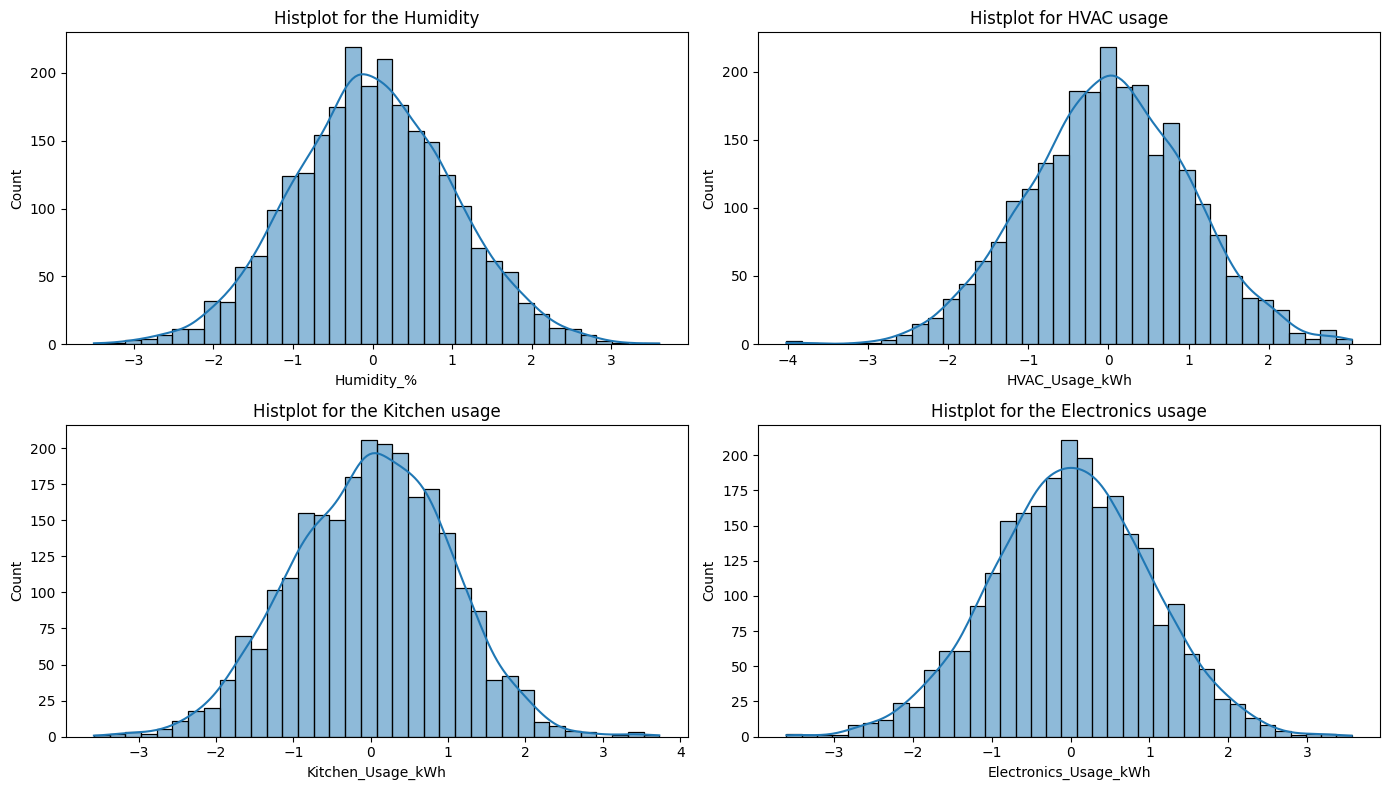

In [26]:
plt.figure(figsize = (14 , 8))

plt.subplot(2 , 2 , 1)
sns.histplot(df , x = 'Humidity_%' , kde = True)
plt.title("Histplot for the Humidity")

plt.subplot(2 , 2 , 2)
sns.histplot(df , x = 'HVAC_Usage_kWh' , kde = True)
plt.title("Histplot for HVAC usage")

plt.subplot(2 , 2 , 3)
sns.histplot(df , x = 'Kitchen_Usage_kWh' , kde = True)
plt.title("Histplot for the Kitchen usage")

plt.subplot(2 , 2 , 4)
sns.histplot(df , x = 'Electronics_Usage_kWh' , kde = True)
plt.title("Histplot for the Electronics usage")

plt.tight_layout()
plt.show()

- With the help of univariate analysis, we can conclude that all the data has been standardized.
- This ensures that the variables have a mean of zero and a standard deviation of one.

#### **Bivariate and Multivariate Analysis**

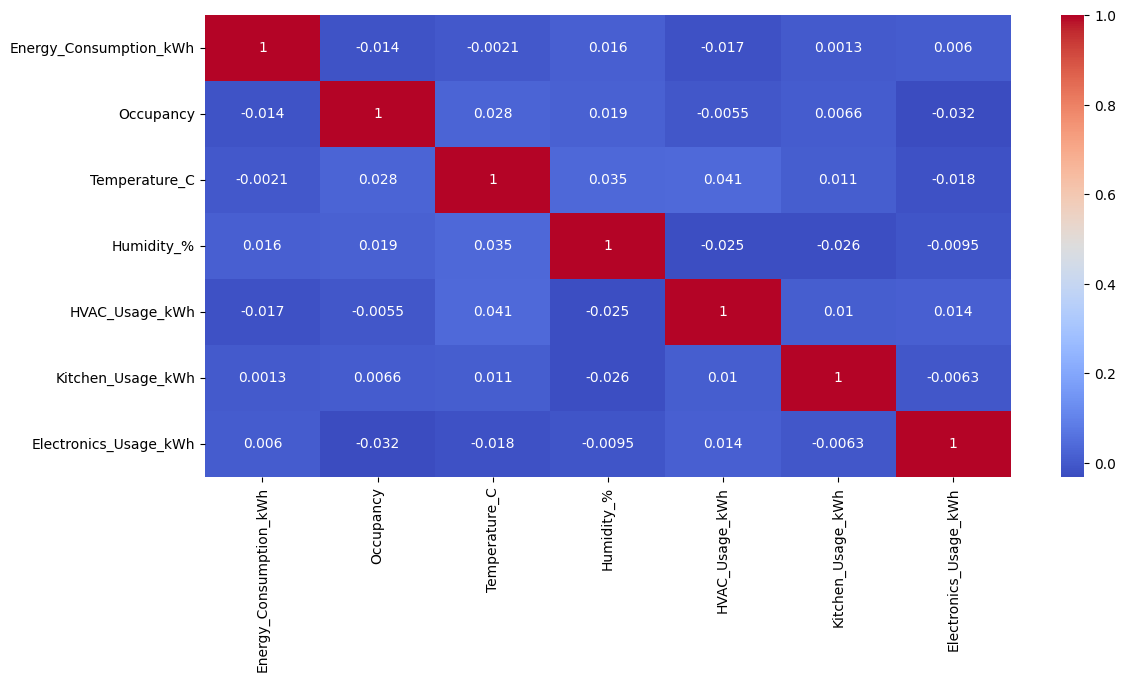

In [27]:
plt.figure(figsize = (13,6))
sns.heatmap(df_num.corr() , annot = True , cmap = 'coolwarm')
plt.show()

- With the heat plot above, we conclude that all the variables are either weakly positively or negatively correlated.

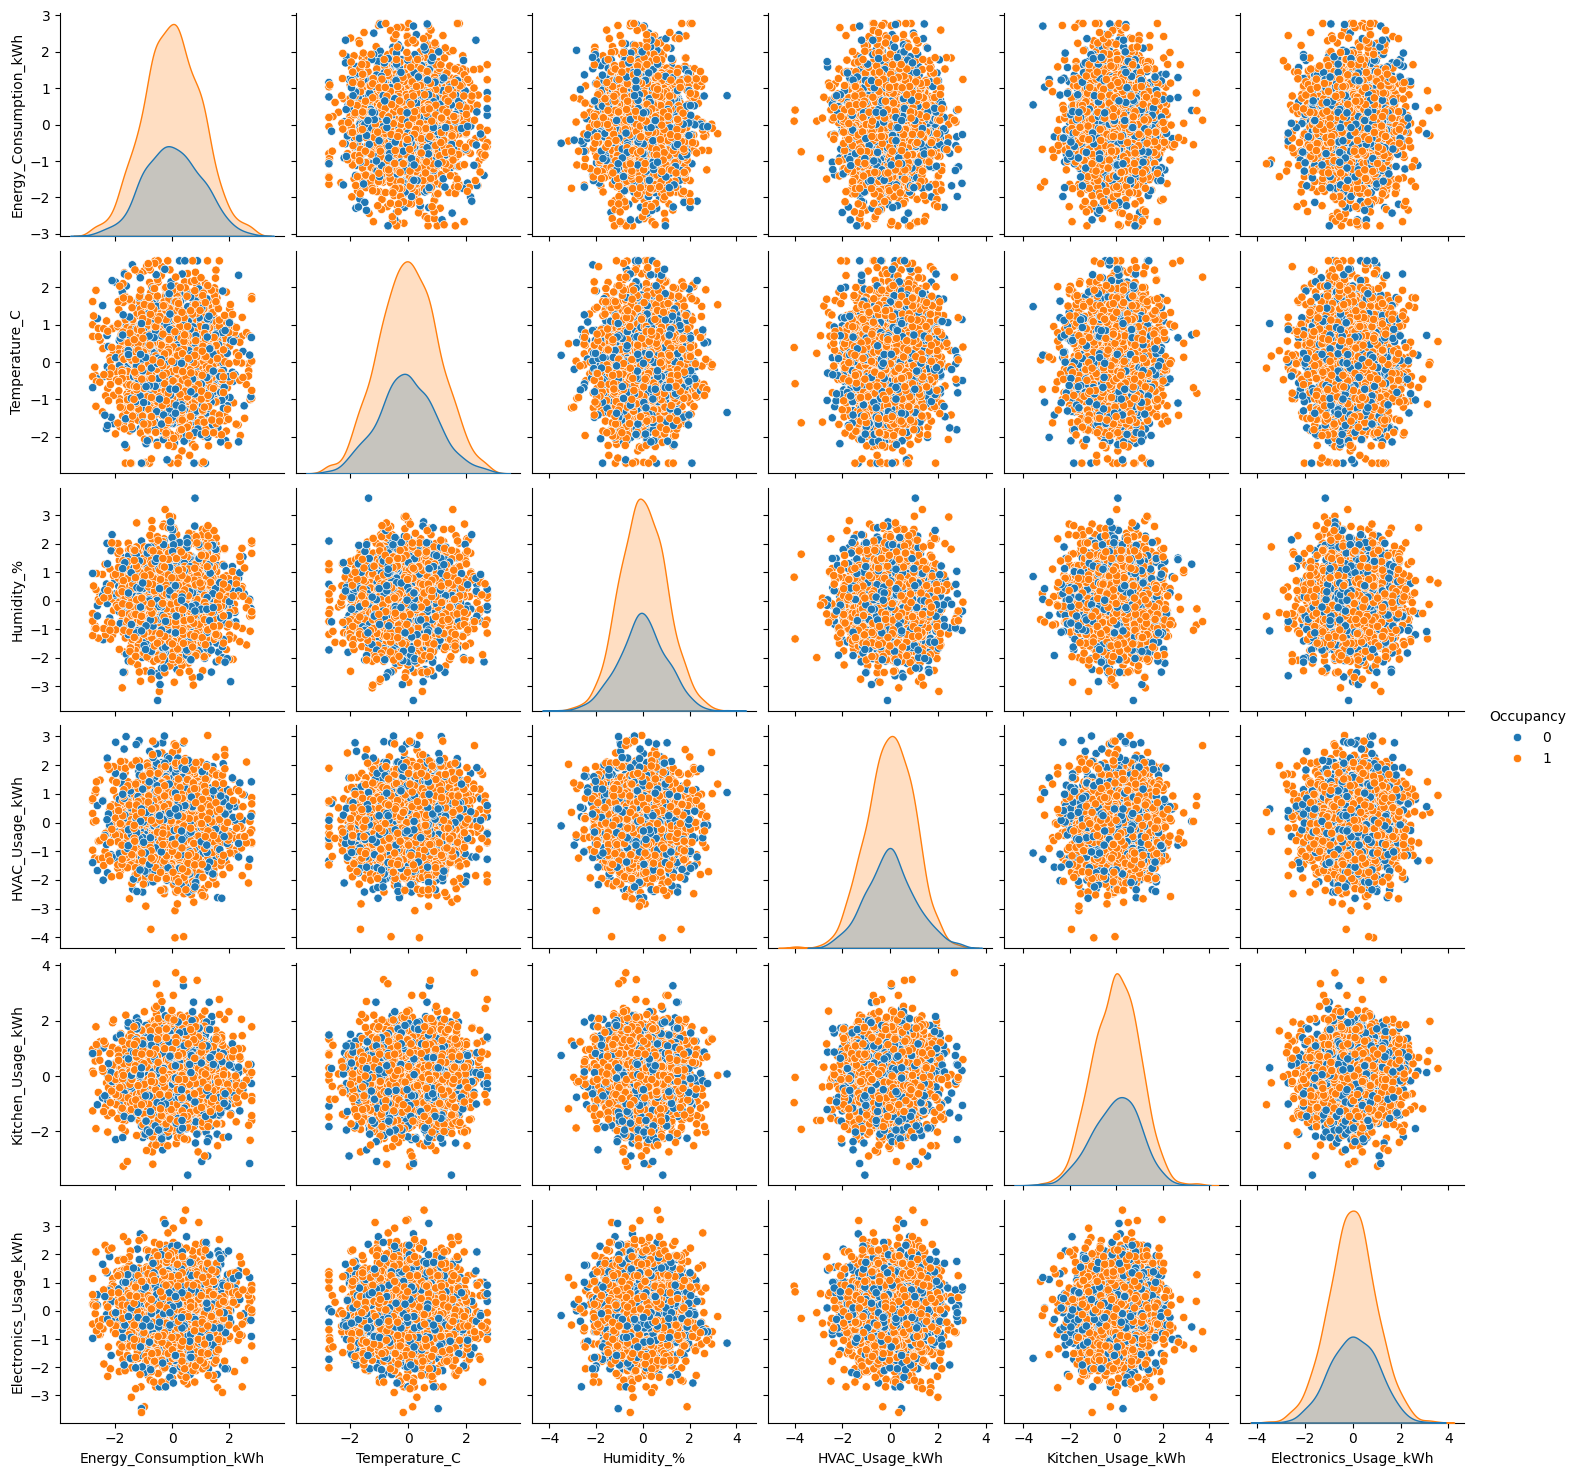

In [28]:
sns.pairplot(df , hue = 'Occupancy')

- With the pair plot above, we can conclude that the data is normally distributed. Aside from that, all the data points are clustered in the same area.

#### **Time-Series Analysis**

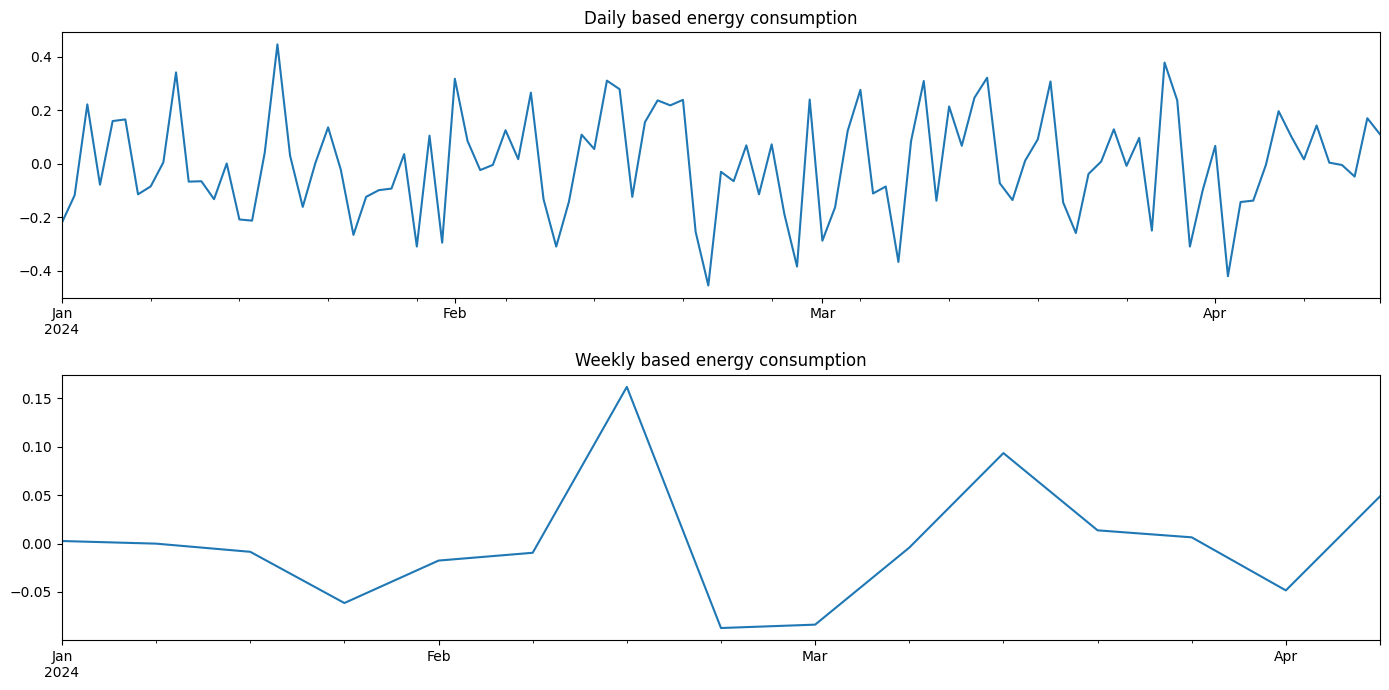

In [29]:
plt.figure(figsize = (14,7))
day_pattern = df.set_index('Date')['Energy_Consumption_kWh'].resample('D').mean()
week_pattern = df.set_index('Date')['Energy_Consumption_kWh'].resample('W').mean()

plt.subplot(2 , 1 , 1)
day_pattern.plot()
plt.title("Daily based energy consumption")
plt.xlabel('')

plt.subplot(2 , 1 , 2)
week_pattern.plot()
plt.title("Weekly based energy consumption")
plt.xlabel('')

plt.tight_layout()
plt.show()

- In the months of **February** and **March**, there is slightly greater energy consumption compared to other months.

#### **Feature Engineering**

In [30]:
df['energy_consumption_per_occupancy'] = df['Energy_Consumption_kWh'] / (df['Occupancy']+1)

- to avoid zero division error we add it by 1

In [31]:
df['Temperature_C_diff'] = df['Temperature_C'].diff()

In [32]:
df['Temperature_C_diff'] = df['Temperature_C_diff'].fillna(df['Temperature_C'])

In [33]:
le = LabelEncoder()

df['Home_ID'] = le.fit_transform(df['Home_ID'])
df['City'] = le.fit_transform(df['City'])

In [34]:
df.head()

Date  Home_ID  City  Energy_Consumption_kWh  Occupancy  \
0 2024-03-14 06:00:00        8     7               -0.300436          1   
1 2024-04-06 06:00:00        9     4                1.013830          1   
2 2024-01-30 13:00:00        4     7               -1.033392          0   
3 2024-03-05 12:00:00        5     0               -2.271835          0   
4 2024-01-19 00:00:00        1     6               -0.898596          0   

   Temperature_C  Humidity_%  HVAC_Usage_kWh  Kitchen_Usage_kWh  \
0       0.342959   -0.935276        0.217523           0.421238   
1       0.733271   -0.981267       -0.925220           1.606044   
2      -1.494597   -0.164247       -2.422607          -1.454705   
3      -0.122710   -0.099318        2.246877           0.050986   
4      -0.532344    1.663227        1.261754          -1.306604   

   Electronics_Usage_kWh  energy_consumption_per_occupancy  Temperature_C_diff  
0              -0.438693                         -0.150218            0.342959  
1              -0.707888                          0.506915            0.390312  
2              -0.842485                         -1.033392           -2.227868  
3               0.133346                         -2.271835            1.371887  
4               1.445670                         -0.898596           -0.409634

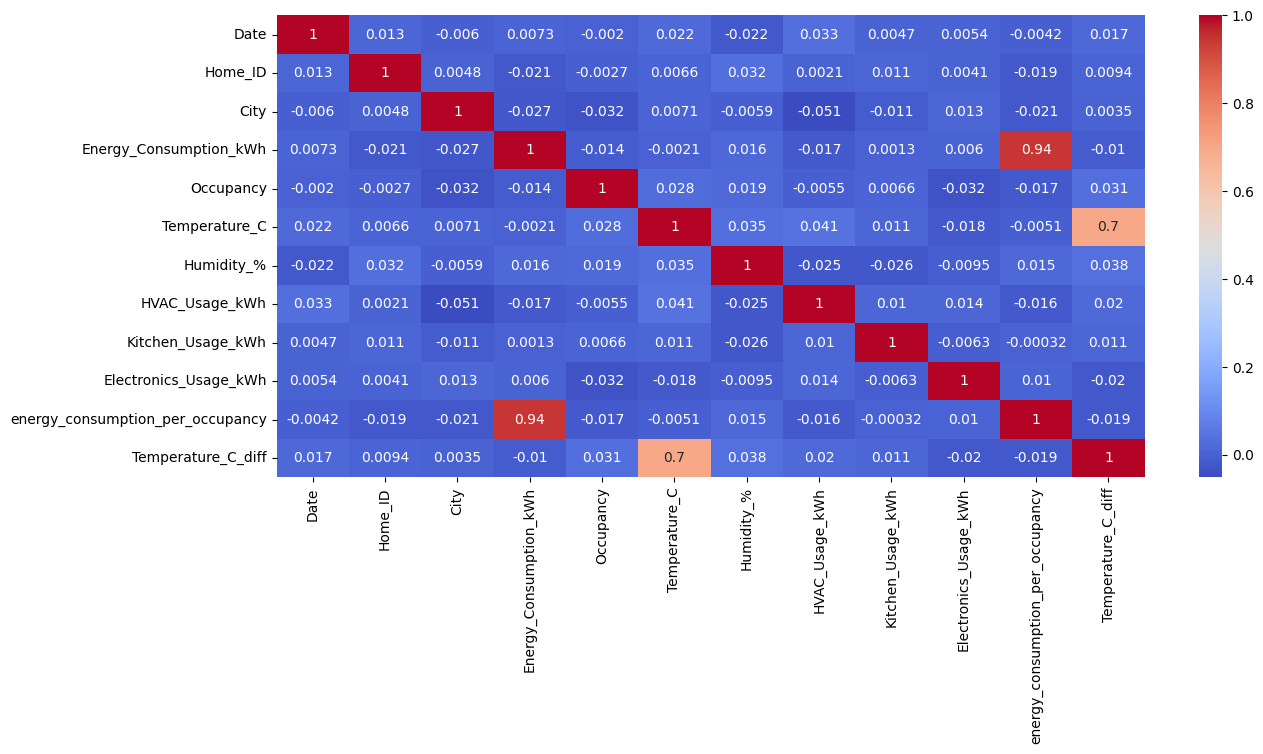

In [35]:
plt.figure(figsize = (14 , 6))
sns.heatmap(df.corr() , annot = True , cmap = 'coolwarm')
plt.show()

- With the use of feature engineering, we can find the relationships between energy consumption and temperature.

#### **Advanced Visualizations**

In [36]:
df.sort_values(by = 'Date' , inplace = True)

In [37]:
px.line(y = day_pattern , labels={'x' : 'Day based' , 'y': 'Energy Consumption'} , title = 'Energy Consumption in day based')

In [38]:
px.line(y = week_pattern , labels={'x' : 'Week based' , 'y': 'Energy Consumption'} , title = 'Energy Consumption in week based')

#### **Documentation of EDA**

1. **Univariate Analysis:**
    - From the univariate analysis, we concluded that the values are normally distributed.
    - This distribution is suitable for linear regression models, indicating the potential for effective predictive analysis.

3. **Bivariate Analysis:**
    - We examined the relationships between different columns using a heatmap to identify correlations.
    - This helped in understanding the interaction between variables, which is crucial for building predictive models.

4. **Time Series Analysis:**
    - We analyzed the energy consumption on both a daily and weekly basis to observe patterns over time.
    - This time series analysis provided insights into how energy consumption fluctuates and can help in forecasting future usage.

5. **Feature Engineering:**
    - Created new features such as energy consumption per occupancy and temperature difference to enhance the model's predictive power.
    - Converted all categorical variables to numeric using LabelEncoder to ensure compatibility with machine learning algorithms.

6. **Advanced Visualization:**
    - After encoding, we revisited the correlation of the data to understand the interactions between newly created features and existing ones.
    - An interactive plot was created using Plotly Express to visualize the energy consumption on a daily and weekly basis, providing a more engaging way to interpret the data.

## **Machine Learning**

In [39]:
y = df['Energy_Consumption_kWh']
x = df.drop(columns = ['Energy_Consumption_kWh' , 'Date'])

In [40]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = .2)

In [41]:
print(f"x_train : {x_train.shape} and x_test : {x_test.shape}")
print(f"y_train : {y_train.shape} and y_test : {y_test.shape}")

x_train : (2000, 10) and x_test : (500, 10)
y_train : (2000,) and y_test : (500,)


In [42]:
model = LinearRegression()

model.fit(x_train , y_train)

LinearRegression()

In [43]:
model.score(x_train , y_train)

0.8896259379294232

In [44]:
model.score(x_test , y_test)

0.8895746669264297

In [45]:
y_pred = model.predict(x_test)

In [46]:
mae = mean_absolute_error(y_test , y_pred)
mse = mean_squared_error(y_test , y_pred)
r2 = r2_score(y_test , y_pred)

print(f"Mean absolute error : {mae}")
print(f"Mean squared error : {mse}")
print(f"R2 score : {r2}")

Mean absolute error : 0.268517159542264
Mean squared error : 0.11775211382823858
R2 score : 0.8895746669264297


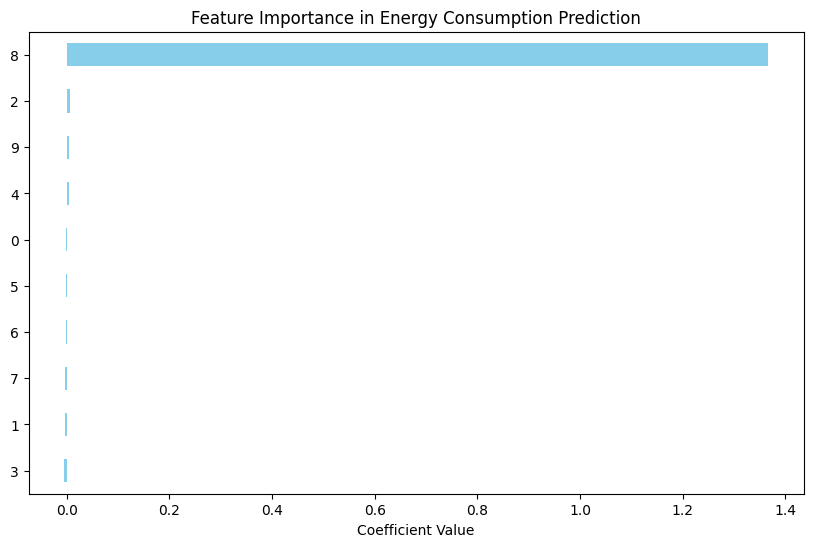

In [47]:
feature_importance = pd.Series(model.coef_).sort_values()

plt.figure(figsize=(10, 6))
feature_importance.plot(kind='barh', color='skyblue')
plt.title('Feature Importance in Energy Consumption Prediction')
plt.xlabel('Coefficient Value')
plt.show()

- energy_consumption_per_occupancy has the higher feature importance

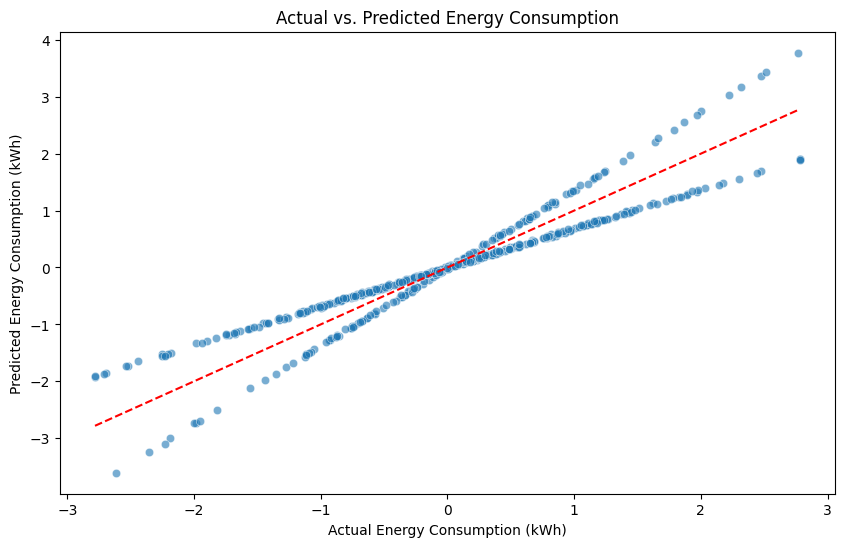

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.title('Actual vs. Predicted Energy Consumption')
plt.xlabel('Actual Energy Consumption (kWh)')
plt.ylabel('Predicted Energy Consumption (kWh)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

#### **Conclusion**

- Prediction precentage(on train dataset) -> 88.96%
- Prediction precentage(on test dataset) -> 88.95%